# Previsão de Votação de Deputados
Modelos preditivos de regressão utilizando a biblioteca scikit learn para a predição 
dos votos de deputados federais considerando dados das últimas eleições.

Tutorial utilizado para o pré processamento de dados: https://www.kaggle.com/apapiu/regularized-linear-models

In [2]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
eleicoes = pd.read_csv('/home/lsp/dados/am/eleicoes_2006_a_2010.csv')
eleicoes[:3]

,ano,sequencial_candidato,nome,uf,partido,quantidade_doacoes,quantidade_doadores,total_receita,media_receita,recursos_de_outros_candidatos/comites,...,quantidade_despesas,quantidade_fornecedores,total_despesa,media_despesa,cargo,sexo,grau,estado_civil,ocupacao,votos
0,2006,10001,JOSÉ LUIZ NOGUEIRA DE SOUSA,AP,PT,6,6,16600.0,2766.666667,NaN,...,14,14,16583.60,1184.542857,DEPUTADO FEDERAL,MASCULINO,ENSINO MÉDIO COMPLETO,CASADO(A),VEREADOR,8579
1,2006,10002,LOIVA DE OLIVEIRA,RO,PT,13,13,22826.0,1755.846154,6625.0,...,24,23,20325.99,883.738696,DEPUTADO FEDERAL,FEMININO,SUPERIOR COMPLETO,SOLTEIRO(A),SERVIDOR PÚBLICO ESTADUAL,2757
2,2006,10002,MARIA DALVA DE SOUZA FIGUEIREDO,AP,PT,17,16,148120.8,9257.550000,2250.0,...,123,108,146011.70,1351.960185,DEPUTADO FEDERAL,FEMININO,SUPERIOR COMPLETO,VIÚVO(A),PEDAGOGO,17428


## Separando dados das eleições

In [6]:
eleicao_2006 = eleicoes[(eleicoes.ano==2006)]
eleicao_2010 = eleicoes[(eleicoes.ano==2010)]

## Pipeline para construção de modelos preditivos


#### Etapas do modelo preditivo ()

Atributos numéricos:
quantidade_doacoes	
- quantidade_doadores	
- total_receita	
- media_receita	
- recursos_de_outros_candidatos/comites	
- recursos_de_pessoas_fisicas	
- recursos_de_pessoas_juridicas	
- recursos_proprios	
- quantidade_despesas	
- quantidade_fornecedores	
- total_despesa	
- media_despesa		
- votos

Atributos categórigos:
- ano	
- sequencial_candidato	
- nome	
- uf	
- partido	
- cargo	
- sexo	
- grau	
- estado_civil	
- ocupacao	

Como saber quais variáveis normalizar, quais variáveis trabalhar em um modelo?


## Distribuição das variáveis 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff0a0ddf668>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7ff0a1177780>]], dtype=object)

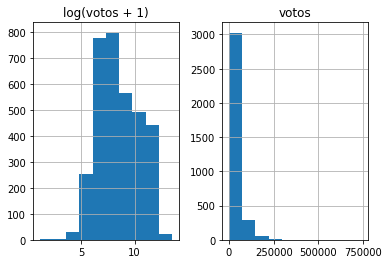

In [15]:
votos = pd.DataFrame({"votos":eleicao_2006['votos'], "log(votos + 1)":np.log1p(eleicao_2006['votos'])})

votos.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff0a0bac3c8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7ff0a0ebf9b0>]], dtype=object)

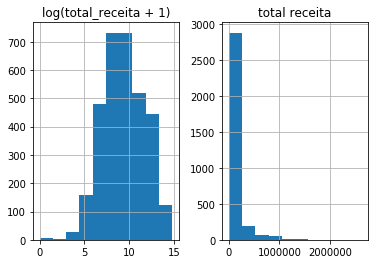

In [16]:
receita = pd.DataFrame({"total receita":eleicao_2006['total_receita'], 
                        "log(total_receita + 1)":np.log1p(eleicao_2006['total_receita'])})

receita.hist()

In [45]:
# #log transform the target:
# train["SalePrice"] = np.log1p(train["SalePrice"])

# #log transform skewed numeric features:
# numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
# skewed_feats = skewed_feats[skewed_feats > 0.75]
# skewed_feats = skewed_feats.index

train = eleicao_2006
teste = eleicao_2010

train.loc['votos'] = np.log1p(train['votos'])

numeric_features = train.dtypes[train.dtypes != "object"].index

print(numeric_features)

skewed_features = train[numeric_features].apply(lambda x: skew(x.dropna()))
skewed_features
skewed_features = skewed_features[skewed_features > 0.75]
skewed_features = skewed_features.index

train[skewed_features] = np.log1p(train[skewed_features])

/home/lsp/anaconda2/envs/notebookEnv/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Index(['ano', 'sequencial_candidato', 'quantidade_doacoes',
       'quantidade_doadores', 'total_receita', 'media_receita',
       'recursos_de_outros_candidatos/comites', 'recursos_de_pessoas_fisicas',
       'recursos_de_pessoas_juridicas', 'recursos_proprios',
       'quantidade_despesas', 'quantidade_fornecedores', 'total_despesa',
       'media_despesa', 'votos'],
      dtype='object')


NameError: ("name 'skew' is not defined", 'occurred at index ano')

In [48]:
# Como funciona get dummies?
pd.get_dummies(train)

,ano,sequencial_candidato,quantidade_doacoes,quantidade_doadores,total_receita,media_receita,recursos_de_outros_candidatos/comites,recursos_de_pessoas_fisicas,recursos_de_pessoas_juridicas,recursos_proprios,...,"ocupacao_TÉCNICO DE OBRAS CIVIS, ESTRADAS, SANEAMENTO E ASSEMELHADOS",ocupacao_TÉCNICO EM AGRONOMIA E AGRIMENSURA,ocupacao_TÉCNICO EM EDIFICAÇÕES,ocupacao_TÉCNICO EM INFORMÁTICA,ocupacao_VENDEDOR DE COMÉRCIO VAREJISTA E ATACADISTA,"ocupacao_VENDEDOR PRACISTA, REPRESENTANTE, CAIXEIRO-VIAJANTE E ASSEMELHADOS",ocupacao_VEREADOR,ocupacao_VETERINÁRIO,ocupacao_VIGILANTE,ocupacao_ZOOTECNISTA
0,2006.0,10001.0,6.0,6.0,16600.00,2766.666667,NaN,9000.00,6300.00,1300.00,...,0,0,0,0,0,0,1,0,0,0
1,2006.0,10002.0,13.0,13.0,22826.00,1755.846154,6625.00,15000.00,1000.00,201.00,...,0,0,0,0,0,0,0,0,0,0
2,2006.0,10002.0,17.0,16.0,148120.80,9257.550000,2250.00,34150.00,62220.80,59500.00,...,0,0,0,0,0,0,0,0,0,0
3,2006.0,10002.0,6.0,6.0,3001.12,500.186667,NaN,1150.00,1101.12,750.00,...,0,0,0,0,0,0,0,0,0,0
4,2006.0,10003.0,48.0,48.0,NaN,NaN,NaN,50878.00,NaN,68942.00,...,0,0,0,0,0,0,0,0,0,0
5,2006.0,10003.0,6.0,6.0,1771.21,295.201667,NaN,NaN,NaN,1771.21,...,0,0,0,0,0,0,0,0,0,0
6,2006.0,10003.0,14.0,7.0,697.00,99.571429,NaN,1231.00,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
7,2006.0,10003.0,2.0,2.0,70000.00,35000.000000,NaN,NaN,NaN,70000.00,...,0,0,0,0,0,0,0,0,0,0
8,2006.0,10004.0,2.0,2.0,6065.00,3032.500000,6065.00,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
9,2006.0,10004.0,68.0,65.0,105813.20,1627.895385,9575.00,59143.20,26000.00,16500.00,...,0,0,0,0,0,0,0,0,0,0


In [51]:
train = train.fillna(train.mean())
train

,ano,sequencial_candidato,nome,uf,partido,quantidade_doacoes,quantidade_doadores,total_receita,media_receita,recursos_de_outros_candidatos/comites,...,quantidade_despesas,quantidade_fornecedores,total_despesa,media_despesa,cargo,sexo,grau,estado_civil,ocupacao,votos
0,2006.0,10001.000000,JOSÉ LUIZ NOGUEIRA DE SOUSA,AP,PT,6.000000,6.000000,16600.000000,2766.666667,13972.28223,...,14.000000,14.000000,1.658360e+04,1184.542857,DEPUTADO FEDERAL,MASCULINO,ENSINO MÉDIO COMPLETO,CASADO(A),VEREADOR,0.277487
1,2006.0,10002.000000,LOIVA DE OLIVEIRA,RO,PT,13.000000,13.000000,22826.000000,1755.846154,6625.00000,...,24.000000,23.000000,2.032599e+04,883.738696,DEPUTADO FEDERAL,FEMININO,SUPERIOR COMPLETO,SOLTEIRO(A),SERVIDOR PÚBLICO ESTADUAL,0.275196
2,2006.0,10002.000000,MARIA DALVA DE SOUZA FIGUEIREDO,AP,PT,17.000000,16.000000,148120.800000,9257.550000,2250.00000,...,123.000000,108.000000,1.460117e+05,1351.960185,DEPUTADO FEDERAL,FEMININO,SUPERIOR COMPLETO,VIÚVO(A),PEDAGOGO,0.278713
3,2006.0,10002.000000,ROMALDO MILANI,MS,PRONA,6.000000,6.000000,3001.120000,500.186667,13972.28223,...,8.000000,8.000000,3.001120e+03,375.140000,DEPUTADO FEDERAL,MASCULINO,ENSINO MÉDIO INCOMPLETO,CASADO(A),MILITAR REFORMADO,0.273167
4,2006.0,10003.000000,ANSELMO DE JESUS ABREU,RO,PT,48.000000,48.000000,95558.433914,4345.204755,13972.28223,...,133.000000,120.000000,1.164166e+05,970.138667,DEPUTADO FEDERAL,MASCULINO,ENSINO FUNDAMENTAL COMPLETO,CASADO(A),DEPUTADO,0.279536
5,2006.0,10003.000000,JOSÉ RODRIGUES DOS SANTOS NETO,PI,PCO,6.000000,6.000000,1771.210000,295.201667,13972.28223,...,9.000000,9.000000,1.771210e+03,196.801111,DEPUTADO FEDERAL,MASCULINO,SUPERIOR COMPLETO,CASADO(A),SERVIDOR PÚBLICO FEDERAL,0.274234
6,2006.0,10003.000000,JOSÉ TOMAZ DA SILVA,MS,PRONA,14.000000,7.000000,697.000000,99.571429,13972.28223,...,17.000000,10.000000,6.969100e+02,69.691000,DEPUTADO FEDERAL,MASCULINO,SUPERIOR COMPLETO,CASADO(A),MÉDICO,0.269102
7,2006.0,10003.000000,LUIZ CARLOS MUNHOZ MEIRA,MG,PPS,2.000000,2.000000,70000.000000,35000.000000,13972.28223,...,332.000000,278.000000,6.601695e+04,237.471043,DEPUTADO FEDERAL,MASCULINO,SUPERIOR COMPLETO,CASADO(A),SERVIDOR PÚBLICO FEDERAL,0.275056
8,2006.0,10004.000000,EDILSON VEIRA ROCHA,AP,PT,2.000000,2.000000,6065.000000,3032.500000,6065.00000,...,10.000000,10.000000,6.060420e+03,606.042000,DEPUTADO FEDERAL,MASCULINO,ENSINO MÉDIO COMPLETO,CASADO(A),"FEIRANTE, AMBULANTE E MASCATE",0.275021
9,2006.0,10004.000000,EDUARDO VALVERDE ARAÚJO ALVES,RO,PT,68.000000,65.000000,105813.200000,1627.895385,9575.00000,...,68.000000,67.000000,1.108182e+05,1654.002985,DEPUTADO FEDERAL,MASCULINO,SUPERIOR COMPLETO,CASADO(A),DEPUTADO,0.279782


In [62]:
train.shape

(3389, 23)

In [64]:
# Faria sentido se estivesse trabalhando com o eleicao ao invés do eleicao_2006
train[:train.shape[0]]

,ano,sequencial_candidato,nome,uf,partido,quantidade_doacoes,quantidade_doadores,total_receita,media_receita,recursos_de_outros_candidatos/comites,...,quantidade_despesas,quantidade_fornecedores,total_despesa,media_despesa,cargo,sexo,grau,estado_civil,ocupacao,votos
0,2006.0,10001.000000,JOSÉ LUIZ NOGUEIRA DE SOUSA,AP,PT,6.000000,6.000000,16600.000000,2766.666667,13972.28223,...,14.000000,14.000000,1.658360e+04,1184.542857,DEPUTADO FEDERAL,MASCULINO,ENSINO MÉDIO COMPLETO,CASADO(A),VEREADOR,0.277487
1,2006.0,10002.000000,LOIVA DE OLIVEIRA,RO,PT,13.000000,13.000000,22826.000000,1755.846154,6625.00000,...,24.000000,23.000000,2.032599e+04,883.738696,DEPUTADO FEDERAL,FEMININO,SUPERIOR COMPLETO,SOLTEIRO(A),SERVIDOR PÚBLICO ESTADUAL,0.275196
2,2006.0,10002.000000,MARIA DALVA DE SOUZA FIGUEIREDO,AP,PT,17.000000,16.000000,148120.800000,9257.550000,2250.00000,...,123.000000,108.000000,1.460117e+05,1351.960185,DEPUTADO FEDERAL,FEMININO,SUPERIOR COMPLETO,VIÚVO(A),PEDAGOGO,0.278713
3,2006.0,10002.000000,ROMALDO MILANI,MS,PRONA,6.000000,6.000000,3001.120000,500.186667,13972.28223,...,8.000000,8.000000,3.001120e+03,375.140000,DEPUTADO FEDERAL,MASCULINO,ENSINO MÉDIO INCOMPLETO,CASADO(A),MILITAR REFORMADO,0.273167
4,2006.0,10003.000000,ANSELMO DE JESUS ABREU,RO,PT,48.000000,48.000000,95558.433914,4345.204755,13972.28223,...,133.000000,120.000000,1.164166e+05,970.138667,DEPUTADO FEDERAL,MASCULINO,ENSINO FUNDAMENTAL COMPLETO,CASADO(A),DEPUTADO,0.279536
5,2006.0,10003.000000,JOSÉ RODRIGUES DOS SANTOS NETO,PI,PCO,6.000000,6.000000,1771.210000,295.201667,13972.28223,...,9.000000,9.000000,1.771210e+03,196.801111,DEPUTADO FEDERAL,MASCULINO,SUPERIOR COMPLETO,CASADO(A),SERVIDOR PÚBLICO FEDERAL,0.274234
6,2006.0,10003.000000,JOSÉ TOMAZ DA SILVA,MS,PRONA,14.000000,7.000000,697.000000,99.571429,13972.28223,...,17.000000,10.000000,6.969100e+02,69.691000,DEPUTADO FEDERAL,MASCULINO,SUPERIOR COMPLETO,CASADO(A),MÉDICO,0.269102
7,2006.0,10003.000000,LUIZ CARLOS MUNHOZ MEIRA,MG,PPS,2.000000,2.000000,70000.000000,35000.000000,13972.28223,...,332.000000,278.000000,6.601695e+04,237.471043,DEPUTADO FEDERAL,MASCULINO,SUPERIOR COMPLETO,CASADO(A),SERVIDOR PÚBLICO FEDERAL,0.275056
8,2006.0,10004.000000,EDILSON VEIRA ROCHA,AP,PT,2.000000,2.000000,6065.000000,3032.500000,6065.00000,...,10.000000,10.000000,6.060420e+03,606.042000,DEPUTADO FEDERAL,MASCULINO,ENSINO MÉDIO COMPLETO,CASADO(A),"FEIRANTE, AMBULANTE E MASCATE",0.275021
9,2006.0,10004.000000,EDUARDO VALVERDE ARAÚJO ALVES,RO,PT,68.000000,65.000000,105813.200000,1627.895385,9575.00000,...,68.000000,67.000000,1.108182e+05,1654.002985,DEPUTADO FEDERAL,MASCULINO,SUPERIOR COMPLETO,CASADO(A),DEPUTADO,0.279782


In [58]:
train[train.shape[0]:]

,ano,sequencial_candidato,nome,uf,partido,quantidade_doacoes,quantidade_doadores,total_receita,media_receita,recursos_de_outros_candidatos/comites,...,quantidade_despesas,quantidade_fornecedores,total_despesa,media_despesa,cargo,sexo,grau,estado_civil,ocupacao,votos


## Tratamento de valores ausentes

## Normalizando dados

## Regressão com Ridge e Lasso

## Regressão não paramétrica como KNN

## Regressão não paramétrica como KNN

## Árvores de Regressão

## Otimizando hiperâmetros

### RMSE de validação cruzada para

### RMSE de validação cruzada para

### RMSE de validação cruzada para

### RMSE de validação cruzada para

## Resíduos x Predições

## Retreino com 2006 e 2010

## Dentre os modelos avaliados, qual foi o que deu o melhor resultado nos dados de 2014 em termos de RMSE? 